# Will It Rain in Sydney, Australia Tomorrow? -- Kristofer Schobert
## Logistic Regression 

In this notebook, we will explore Logistic Regression to predict if it will rain tomorrow for a given day in Sydney, Australia. We have already prepared this dataset for modeling in a previous assignment titled, "SydneyRain_Preparing_dataset_for_modeling.ipynb". Here, we will use that weather data with those selected features to predict if it will rain tomorrow via three models: 

1. Logistic Regression
2. Ridge Logistic Regression
3. Lasso Logistic Regression

Let's start where we left off on that previous assignment. 

Here is the link to this dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package



# Starting Challenge: Compare Logistic, Logistic Ridge and Logistic Lasso Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('weatherAUS.csv')
df = df[df.Location =='Sydney'].reset_index().drop('index', axis=1)
df.head(12)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,...,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,...,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,12.6,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,...,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,8.8,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,NaN,NaN,W,...,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,0.0,No


In [3]:
# We are creating features here that we believed would be useful during our feature selection process of the previous assignment.
# NOTE: df will now be a different dataframe that it was in the original project in which we analysed a dataset for modeling
df['Month'] = pd.to_numeric(df.Date.str.slice(5, 7))
df = df.drop(['Date','RISK_MM','Location','WindGustDir','WindGustSpeed'],axis=1)
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['Humidity3pm_over_Temp3pm'] = df['Humidity3pm'] / df['Temp3pm']
df['Sunshine_times_Temp3pm'] = df['Sunshine'] / df['Temp3pm']
df['Change_in_Humidity'] = df['Humidity3pm'] - df['Humidity9am']

#Making the entries of "RainTomorrow" 1 or 0 rather than Yes or No
df['RainTomorrow'] = df['RainTomorrow'].where(df['RainTomorrow'] == 'Yes', 0)
df['RainTomorrow'] = df['RainTomorrow'].where(df['RainTomorrow'] == 0, 1)

In [4]:
df.head(12)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,TempRange,Humidity3pm_over_Temp3pm,Sunshine_times_Temp3pm,Change_in_Humidity
0,19.5,22.4,15.6,6.2,0.0,S,SSW,17.0,20.0,92.0,...,8.0,20.7,20.9,Yes,1,2,2.9,4.019139,0.000000,-8.0
1,19.5,25.6,6.0,3.4,2.7,W,E,9.0,13.0,83.0,...,7.0,22.4,24.8,Yes,1,2,6.1,2.943548,0.108871,-10.0
2,21.6,24.5,6.6,2.4,0.1,ESE,ESE,17.0,2.0,88.0,...,8.0,23.5,23.0,Yes,1,2,2.9,3.739130,0.004348,-2.0
3,20.2,22.8,18.8,2.2,0.0,NNE,E,22.0,20.0,83.0,...,8.0,21.4,20.9,Yes,1,2,2.6,4.306220,0.000000,7.0
4,19.7,25.7,77.4,NaN,0.0,NNE,W,11.0,6.0,88.0,...,8.0,22.5,25.5,Yes,1,2,6.0,2.901961,0.000000,-14.0
5,20.2,27.2,1.6,2.6,8.6,W,ENE,9.0,22.0,69.0,...,6.0,23.8,26.0,Yes,1,2,7.0,2.384615,0.330769,-7.0
6,18.6,26.3,6.2,5.2,5.2,W,S,15.0,15.0,75.0,...,7.0,21.7,22.3,Yes,1,2,7.7,3.587444,0.233184,5.0
7,17.2,22.3,27.6,5.8,2.1,S,SE,7.0,15.0,77.0,...,8.0,18.9,21.1,Yes,1,2,5.1,2.890995,0.099526,-16.0
8,16.4,20.8,12.6,4.8,3.0,SSW,W,19.0,9.0,92.0,...,7.0,17.1,16.5,Yes,1,2,4.4,5.515152,0.181818,-1.0
9,14.6,24.2,8.8,4.4,10.1,W,SSE,11.0,20.0,80.0,...,2.0,17.2,23.3,Yes,0,2,9.6,2.274678,0.433476,-27.0


# Logistic Regression No Regularization

In [26]:
# using get_dummies to make a new column for each value of a categorical variable
#dropping rows with any nan values
df_nonan = df.dropna()
df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
lr = LogisticRegression(C=1e9)
y = df_nonan['RainTomorrow']
y = y.astype('int')
X = df_input

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print('y-intercept')
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy:')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

from sklearn.model_selection import cross_val_score
print('\n Cross Validation Score')
lr_score = cross_val_score(lr, X, y, cv=10)
print(lr_score)
print("Cross Validation Yields: %0.4f (+/- %0.4f)" % (lr_score.mean(), lr_score.std() * 2))


Coefficients
[[-0.0974998  -0.00821125  0.01053758  0.02535814 -0.19203716  0.01295851
   0.03250034  0.01753921  0.00682196  0.06103127 -0.07055063 -0.06086598
   0.16121603  0.19209078  0.05732727 -0.00157412  0.08928855  0.99756142
   0.0422264  -0.01071725  0.10603053  0.08565739 -0.08204945 -0.15635478
   0.09570568 -0.03979247 -0.31337389  0.50755156 -0.25889547 -0.08640728
  -0.05967986 -0.12124111  0.08475354  0.00947803 -0.0472631   0.31163333
  -0.69316616 -0.83581635  0.09457453 -0.4107483  -0.3529569  -0.00176926
   0.46061268 -0.0053677   0.76871295  0.33995249  0.08216394  0.62421695
   0.2207222  -0.16356911 -0.33036101  0.2385517  -0.2273185   0.26307114]]
y-intercept
[0.03575264]

 Accuracy:
RainTomorrow     0    1
row_0                  
0             1844  288
1              122  361

 Percentage accuracy
0.8432122370936902

 Cross Validation Score
[0.85877863 0.83587786 0.82824427 0.83587786 0.82061069 0.84351145
 0.82758621 0.85057471 0.83141762 0.85384615]
Cross V

We see that our model is doing alright. We have a good percent accuarcy 84%. We have 122 false positives (Type I Error) and 288 false negatives (Type II Error). We correctly predicted 94% of the instances of no rain tomorrow, but only 55% of the instances with rain tomorrow. Our overall percent accuracy would likely not be as high if we had more instances of rain tomorrow. 

Our cross validation score is 84% as well. This is our model's mean accuracy for each of the hold out testing datasets. It makes very little sense to calculate an R^2 score on a classifier. It can be done but is not helpful. Logistic Regressions fit the log(odds) regression line via a different method than minimizing R^2. We find the maximum of the sum of -log(probability) for testing points with the actual value of 1 and -log(1-probability) for testing points with the actual value of 0. 

Also, we certainly have a lot of features... Let's leave them be for now. We can learn which ones are uselss when via Ridge Regression and especially via Lasso Regression.

# Ridge Logistic Regression 

In [5]:
# using get_dummies to make a new column for each value of a categorical variable
#dropping rows with any nan values
df_nonan = df.dropna()
df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
ridge = LogisticRegression(penalty='l2', C=100)
y = df_nonan['RainTomorrow']
y = y.astype('int')
X = df_input

# Fit the model.
fit = ridge.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print('y-intercept')
print(fit.intercept_)
pred_y_sklearn = ridge.predict(X)

#print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(ridge.score(X, y))


from sklearn.model_selection import cross_val_score
print('\n Cross Validation Score')
ridge_score = cross_val_score(ridge, X, y, cv=10)
print(ridge_score) 

print("Cross Validation Yields: %0.4f (+/- %0.4f)" % (ridge_score.mean(), ridge_score.std() * 2))

Coefficients
[[-1.01651493e-01  1.16127546e-05  9.14507118e-03  2.61839477e-02
  -2.01015031e-01  1.13744529e-02  3.15150250e-02  1.90132086e-02
   8.28585256e-03  6.14460574e-02 -7.10456408e-02 -4.40655527e-02
   1.44766425e-01  2.07298720e-01  3.44567220e-02 -1.43608665e-03
   1.01663106e-01  9.59368211e-01  1.33605307e-01 -1.07273561e-02
   1.65731835e-01  2.18247917e-01 -7.63986586e-02 -1.33911849e-01
   1.73727413e-01 -2.43955038e-02 -4.19435045e-01  6.90838938e-01
  -3.46489039e-01 -1.78722155e-01 -1.83804427e-01 -2.04280094e-01
   2.26611846e-02  4.72270057e-03 -3.15966220e-02  4.08963628e-01
  -7.40914477e-01 -9.01927829e-01  1.16372236e-01 -6.59795806e-01
  -4.20887690e-01 -1.34631497e-01  7.00826608e-01 -9.42472597e-02
   8.50830300e-01  4.17732107e-01  1.46591458e-01  7.30134972e-01
   4.29609187e-01 -2.49289434e-01 -4.85754331e-01  3.81211677e-01
  -2.12087298e-01  2.97947522e-01]]
y-intercept
[0.08586022]
RainTomorrow     0    1
row_0                  
0             1844  

Our Ridge Logistic Regression Model did not perform much better than our vanilla logistic regression model. It correctly identified 5 more instances of rain tomorrow, so at lease we have this small improvement. 

The mean cross validation score of this model is a slightly lower than the mean cross validation score of the previous model. However, the error in these measurements (2 standard deviations) is much larger than the difference between the two means. Thus, we cannot say one's cross validation score is better than the others.

Let's take a look to see a plot of cross validation score vs C values. Maybe, we will see a clear best value for C.

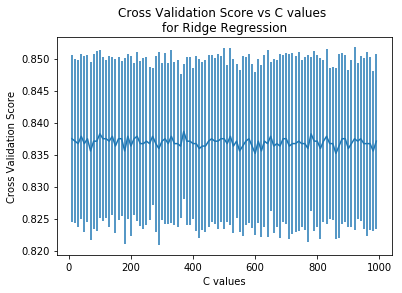

In [23]:
## Changing out C value (inverse lambda value) to find the optimal values given our dataset.
from sklearn.model_selection import cross_val_score
ccs = list(range(10,1000,10))
ridge_scores = []
ridge_2sigma = []
for cc in ccs:
    # using get_dummies to make a new column for each value of a categorical variable
    #dropping rows with any nan values
    df_nonan = df.dropna()
    df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
    ridge = LogisticRegression(penalty='l2', C=cc)
    y = df_nonan['RainTomorrow']
    y = y.astype('int')
    X = df_input

    # Fit the model.
    fit = ridge.fit(X, y)
    ridge_score = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(ridge_score.mean())
    ridge_2sigma.append(ridge_score.std())
    
#Create plot
plt.errorbar(ccs, ridge_scores, yerr = ridge_2sigma)
plt.title('Cross Validation Score vs C values \nfor Ridge Regression')
plt.xlabel('C values')
plt.ylabel('Cross Validation Score')
plt.show()


It looks like there is no clear best value for C for our ridge logistic regression. The errorbars on this figure are all much larger than the range of the acutal means. 

Maybe if we look at values of C close to zero we will see a trend?

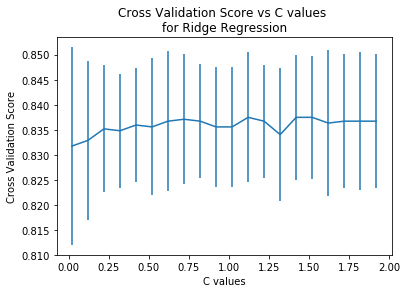

In [36]:
## Changing out C value (inverse lambda value) to find the optimal values given our dataset.
from sklearn.model_selection import cross_val_score
ccs = [x / 50.0 for x in range(1, 100, 5)]
ridge_scores = []
ridge_2sigma = []
for cc in ccs:
    # using get_dummies to make a new column for each value of a categorical variable
    #dropping rows with any nan values
    df_nonan = df.dropna()
    df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
    ridge = LogisticRegression(penalty='l2', C=cc)
    y = df_nonan['RainTomorrow']
    y = y.astype('int')
    X = df_input

    # Fit the model.
    fit = ridge.fit(X, y)
    ridge_score = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(ridge_score.mean())
    ridge_2sigma.append(ridge_score.std())
    
#Create plot
plt.errorbar(ccs, ridge_scores, yerr = ridge_2sigma)
plt.title('Cross Validation Score vs C values \nfor Ridge Regression')
plt.xlabel('C values')
plt.ylabel('Cross Validation Score')
plt.show()

No, there is still no clear trend for these small C values. It may seem like the mean descreases as we approace 0, but the errorbars are still to large to claim anything. It looks like our model does not benifit from the L2 regularization. 

# Lasso Logistic Regression 

In [8]:
# using get_dummies to make a new column for each value of a categorical variable
#dropping rows with any nan values
df_nonan = df.dropna()
df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
lasso = LogisticRegression(penalty='l1', C=2)
y = df_nonan['RainTomorrow']
y = y.astype('int')
X = df_input

# Fit the model.
fit = lasso.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print('y-intercept')
print(fit.intercept_)
pred_y_sklearn = lasso.predict(X)

#print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lasso.score(X, y))


from sklearn.model_selection import cross_val_score
print('\n Cross Validation Score')
lasso_score = cross_val_score(lasso, X, y, cv=10)
print(lasso_score)
print("Cross Validation Yields: %0.4f (+/- %0.4f)" % (lasso_score.mean(), lasso_score.std() * 2))

Coefficients
[[-0.0726094  -0.02101232  0.01002506  0.02111418 -0.19222601  0.00976619
   0.0308986   0.01789993  0.01101849 -0.00447585 -0.00501187 -0.04133344
   0.14413805  0.18122759  0.04430865  0.          0.13388748  0.93427037
   0.         -0.00977267  0.15251016  0.15787445 -0.0042955   0.
   0.17179667  0.         -0.26342687  0.64937733 -0.23353985 -0.05004265
  -0.03864266 -0.08670807  0.          0.03547895  0.          0.36139153
  -0.7185236  -0.85223096  0.02656073 -0.57201726 -0.33327813 -0.00378457
   0.65200612  0.          0.6831522   0.26986129  0.00796106  0.55227481
   0.28974456 -0.21800146 -0.43572845  0.19492333  0.          0.47004743]]
y-intercept
[0.]
RainTomorrow     0    1
row_0                  
0             1843  283
1              123  366

 Percentage accuracy
0.8447418738049713

 Cross Validation Score
[0.85877863 0.83206107 0.82824427 0.82824427 0.81679389 0.84351145
 0.82375479 0.85823755 0.83141762 0.85384615]
Cross Validation Yields: 0.8375 (+/

As we can see, some coefficients have gone to zero. This is one of the great benifits of lasso regression. I have also learned that we can take all the coefficients to zero if we make our C parameter small enough. Thus by varying the C value, we can see which parameters are more significant than others. 

Our accuracy and cross validation score is roughly the same as it was in our other models. 

Let's make a plot of our cross validation score versus C value for our lasso model.

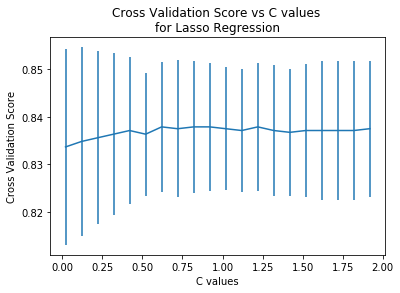

In [6]:
## Changing out C value (inverse lambda value) to find the optimal values given our dataset.
from sklearn.model_selection import cross_val_score
ccs = [x / 50.0 for x in range(1, 100, 5)]
lasso_scores = []
lasso_2sigma = []
for cc in ccs:
    # using get_dummies to make a new column for each value of a categorical variable
    #dropping rows with any nan values
    df_nonan = df.dropna()
    df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
    lasso = LogisticRegression(penalty='l1', C=cc)
    y = df_nonan['RainTomorrow']
    y = y.astype('int')
    X = df_input

    # Fit the model.
    fit = lasso.fit(X, y)
    lasso_score = cross_val_score(lasso, X, y, cv=10)
    lasso_scores.append(lasso_score.mean())
    lasso_2sigma.append(lasso_score.std())
    
#Create plot
plt.errorbar(ccs, lasso_scores, yerr = lasso_2sigma)
plt.title('Cross Validation Score vs C values \nfor Lasso Regression')
plt.xlabel('C values')
plt.ylabel('Cross Validation Score')
plt.show()

Here, we have a plot of Cross Validation Scores for our lasso regression model with various C values ranging from 0.2 to 1.92 in steps of 0.1. There is no obvious best or worse value for C. The differences in the mean cross validation score is very small compared to the errorbars. 

Let's try a larger range of C values. maybe there will be an ovbious trend if we broaded our scope.

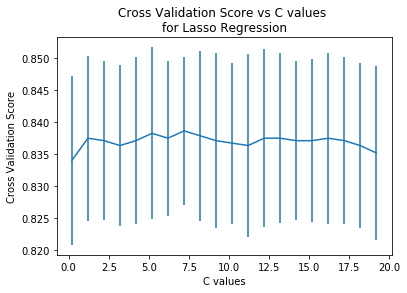

In [7]:
## Changing out C value (inverse lambda value) to find the optimal values given our dataset.
from sklearn.model_selection import cross_val_score
ccs = [x / 5.0 for x in range(1, 100, 5)]
lasso_scores = []
lasso_2sigma = []
for cc in ccs:
    # using get_dummies to make a new column for each value of a categorical variable
    #dropping rows with any nan values
    df_nonan = df.dropna()
    df_input = pd.get_dummies(df_nonan.drop(['RainTomorrow'], axis=1))
    lasso = LogisticRegression(penalty='l2', C=cc)
    y = df_nonan['RainTomorrow']
    y = y.astype('int')
    X = df_input

    # Fit the model.
    fit = lasso.fit(X, y)
    lasso_score = cross_val_score(lasso, X, y, cv=10)
    lasso_scores.append(lasso_score.mean())
    lasso_2sigma.append(lasso_score.std())
    
#Create plot
plt.errorbar(ccs, lasso_scores, yerr = lasso_2sigma)
plt.title('Cross Validation Score vs C values \nfor Lasso Regression')
plt.xlabel('C values')
plt.ylabel('Cross Validation Score')
plt.show()

Here, our C values range from 0.2 to 19.2 in steps of 1. There is no clear best value for C in our lasso model. The errorbars far outweigh any variation in the mean cross validation score for any given C. 

## Conclusion

For this particular dataset, all three models, regular logistic regression, ridge logistic regression and lasso logistic regression all performed roughly the same. We have tried varying the C value no optimal value was found. All of our models had an accuracy of roughly 83.5%. Our models were best at correctly classifying instances when it would not rain the net day. We correctly predicted 94% of the instances of no rain tomorrow, but only 55% of the instances with rain tomorrow.

To further improve the models, a further dive into other parameters would be a good idea. SKLearn's LogisticRegression model has many more options that are worth exploring. Perhaps, there is some parameter we could change to help us correctly identify instances when it would rain the next day. 